In [15]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

!dir "../data/raw"

 Volume in drive C has no label.
 Volume Serial Number is 6244-D5A7

 Directory of C:\Users\Alexandre\Documents\GitHub\keep-on-trucking\data\raw

27/02/2019  00:17    <DIR>          .
27/02/2019  00:17    <DIR>          ..
24/11/2018  20:08               117 .gitignore
25/02/2019  22:19           160 010 sampleSubmission_data.csv
25/02/2019  22:22        11 990 683 test_data_set.csv
25/02/2019  22:28        44 897 215 training_data_set.csv
               4 File(s)     57 048 025 bytes
               2 Dir(s)  15 133 270 016 bytes free


In [3]:
df = pd.read_csv("../data/raw/training_data_set.csv", index_col = "ID").sample(frac=1).reset_index(drop=True)
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,40340,na,1236,1148,0,0,0,0,0,...,572644,225330,372374,266576,311666,37066,11964,54,0,0
1,0,1002040,na,2152,2150,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1280,2,44,24,0,0,0,0,0,...,9116,5118,4696,3254,7194,25438,130,0,0,0
3,0,29976,na,1112,1008,0,0,0,0,0,...,233884,116568,282216,547826,159814,36446,4342,0,0,0
4,0,119454,na,930,642,0,0,0,0,0,...,775774,400504,1008238,1280686,1333026,522666,121434,118,0,0


# Data Prep
perform the following tasks:
- convert every column type to numeric 

In [12]:
df_clean = df.replace('na',np.nan)
df_clean = df_clean.astype(np.number)
df_clean = df_clean.rename(columns={'class':'target'})
df_clean.head()

,target,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,40340.0,NaN,1236.0,1148.0,0.0,0.0,0.0,0.0,0.0,...,572644.0,225330.0,372374.0,266576.0,311666.0,37066.0,11964.0,54.0,0.0,0.0
1,0.0,1002040.0,NaN,2152.0,2150.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1280.0,2.0,44.0,24.0,0.0,0.0,0.0,0.0,0.0,...,9116.0,5118.0,4696.0,3254.0,7194.0,25438.0,130.0,0.0,0.0,0.0
3,0.0,29976.0,NaN,1112.0,1008.0,0.0,0.0,0.0,0.0,0.0,...,233884.0,116568.0,282216.0,547826.0,159814.0,36446.0,4342.0,0.0,0.0,0.0
4,0.0,119454.0,NaN,930.0,642.0,0.0,0.0,0.0,0.0,0.0,...,775774.0,400504.0,1008238.0,1280686.0,1333026.0,522666.0,121434.0,118.0,0.0,0.0


# Data exploration

In [5]:
# Columns with less values
df_clean.drop(columns=['class']).nunique().sort_values().head(10)

cd_000     1
ch_000     2
as_000    21
ef_000    28
ab_000    29
dz_000    47
eg_000    49
cs_009    53
au_000    56
ar_000    68
dtype: int64

In [130]:
target = df_clean["class"]==1
m1 = lambda col: np.abs(col[target].mean()-col[~target].mean()) - (col[target].std() + col[~target].std())/2
m2 = lambda col: np.abs(col[target].mean()-col[~target].mean()) / (col[target].std() + col[~target].std())
m3 = lambda col: (np.abs(col[target].mean()-col[~target].mean()) - (col[target].std() + col[~target].std())/2)/col.std()

In [98]:
col[df_clean["class"]==1].mean()

662381.7057229525

In [144]:
sc = StandardScaler()
df_rescaled = pd.DataFrame(sc.fit_transform(df_clean.fillna(0).drop("class",1)),
                   columns = df_clean.columns.drop("class"))
df_rescaled.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.408011,-0.096307,-0.432859,-0.004079,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,...,-0.005699,-0.195093,-0.046973,0.385598,-0.289565,-0.197048,-0.305079,-0.175699,-0.020257,-0.02354
1,0.986128,-0.096307,-0.432859,-0.004092,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,...,0.824666,1.101629,1.189367,1.205912,1.099597,0.365770,1.555265,-0.110122,-0.020257,-0.02354
2,-0.403238,3.459662,-0.432859,-0.004092,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,...,-0.381692,-0.384051,-0.375548,-0.346803,-0.301058,-0.193251,-0.306139,-0.175699,-0.020257,-0.02354
3,-0.403335,1.089016,-0.432859,-0.004091,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.068726,...,-0.380033,-0.384317,-0.377300,-0.341989,-0.302245,-0.195548,-0.306389,-0.175699,-0.020257,-0.02354
4,-0.407653,-0.096307,-0.432859,-0.004092,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,...,-0.381476,-0.385049,-0.379030,-0.349192,-0.309589,-0.199198,-0.306729,-0.171928,-0.020257,-0.02354


In [182]:
df_train = df_rescaled[df["class"]==1].iloc[:10]

df_train = df_train.append(df_rescaled.sample(90)).drop_duplicates()

df_train.shape

## Run pandas-profiling

profile = pandas_profiling.ProfileReport(train_clean)
profile.to_file(outputfile="../reports/pandas_profiling.html")

### Conclusions
    1) a lot of highly correlated features
    2) a lot of highly skewed variables (all except bk_000, bl_000, bs_000, ca_000 and cb_000)
    3) range of values very large (maybe due to outliers)

### Next steps
- 1) could be solved with **PCA (or SVD)**
- some of the feats affected by 3) could be improved by **removing outliers**
- modelling

# Exploring histograms

In [8]:
hist_cols = ["ee","cs","cn","ag","ba","az","ay"]

def plot_hist_data(df,prefix='ee'):
    df_2 = df.loc[:,df.columns.map(lambda x:x[:2]==prefix)].apply(lambda row:row/row.sum(),axis=1)
    df_stacked = pd.DataFrame(df_2.stack(),columns=["norm_count"]).reset_index(1).join(df.target)

    plt.figure(figsize=(15,5))
    sns.violinplot(x="level_1", y="norm_count", hue='target', data = df_stacked, scale="width", split=True)

## ee

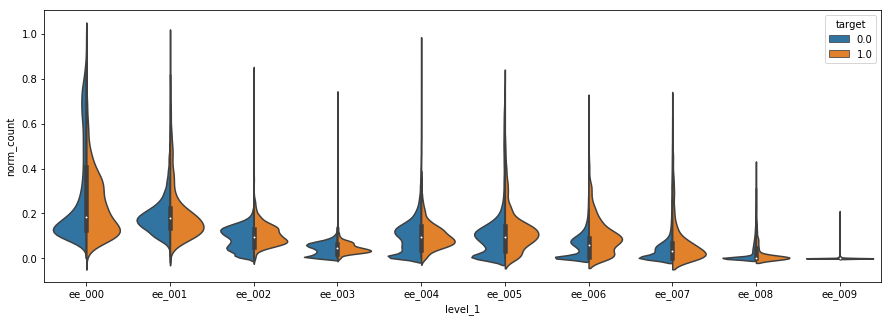

In [16]:
plot_hist_data(df_clean,prefix='ee')

## cs

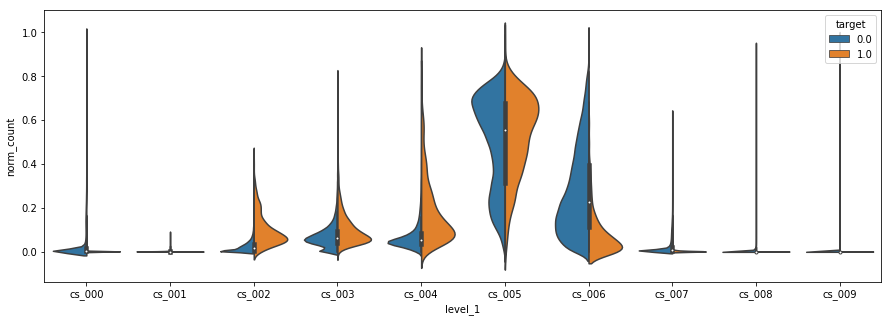

In [17]:
plot_hist_data(df_clean,prefix='cs')

## cn



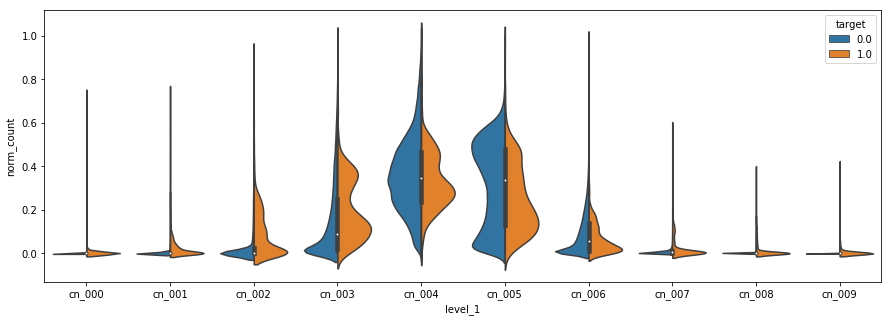

In [18]:
plot_hist_data(df_clean,prefix='cn')

## ag

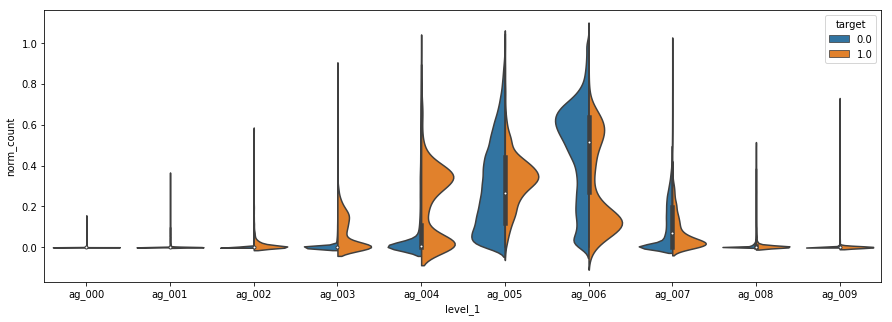

In [19]:
plot_hist_data(df_clean,prefix='ag')

## ba

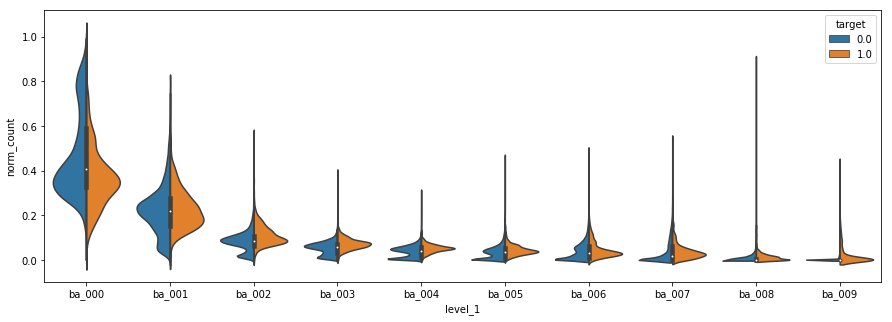

In [20]:
plot_hist_data(df_clean,prefix='ba')

## az

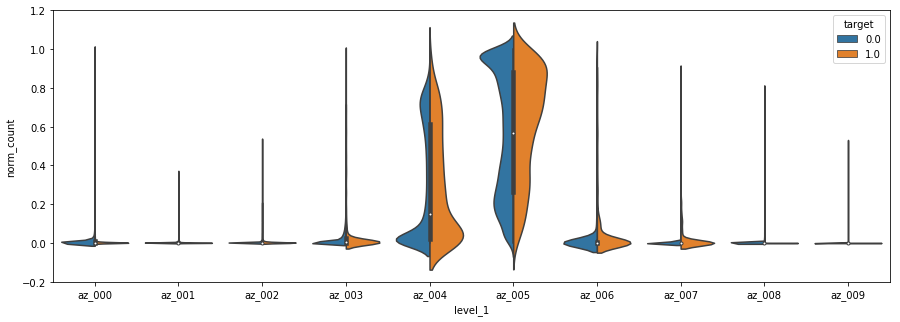

In [21]:
plot_hist_data(df_clean,prefix='az')

## ay

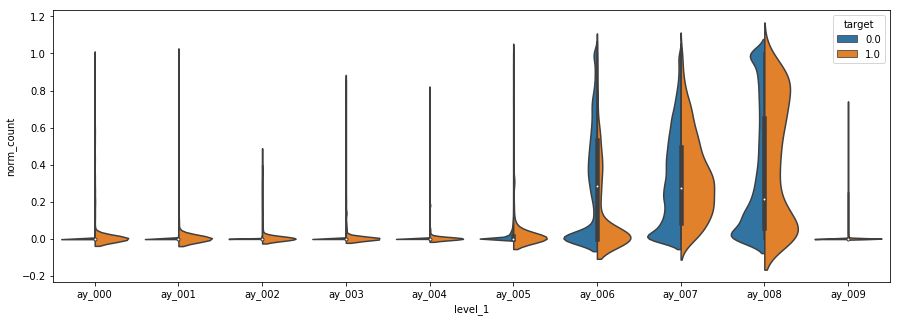

In [22]:
plot_hist_data(df_clean,prefix='ay')

## Conclusions
Some bins show clear difference for 1's and 0's as for example:
    - ag_003 to ag_007
    - cs_004 and cs_006
    
however this type of data should always be normalized